In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC

# Lectura del dataset

In [2]:
df = None
df = pd.read_csv('sintomas-analitica.txt', sep='\t', encoding = "utf_16").apply(lambda x: x.astype(str).str.lower())
df

,HC,Centro de Salud,Fecha IC,Sexo,Edad,Hemoglobina,FA,LDH,VSG,PCR,CEA,Ca19.9,AFP,PSA,2 Microglobulinemia,CA 12.5,Dg final,Localización cáncer,Dg final2
0,282474,escaleritas,28/9/18,0,78,normal,normal,normal,normal,normal,nan,nan,nan,nan,nan,nan,demencia,0,demencia
1,468340,alcaravaneras,13/9/18,0,46,normal,normal,normal,normal,normal,nan,nan,nan,nan,nan,nan,0,-,0
2,379990,schamman,12/9/18,1,75,baja,normal,normal,elevado,normal,nan,normal,nan,nan,nan,nan,cáncer,pulmón,cáncer pulmón
3,208732,santa maría de guía,4/9/18,1,75,normal,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,cáncer,recto,cáncer recto
4,76446,moya,6/9/18,1,47,normal,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,-,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,267055,escaleritas,25/10/19,1,68,elevado,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,depresión,-,depresión
176,663591,puerto,25/10/19,0,19,normal,normal,normal,normal,normal,nan,nan,nan,nan,nan,nan,0,-,0
177,430461,moya,28/10/19,0,53,normal,normal,normal,normal,elevado,nan,nan,nan,nan,nan,nan,0,-,0
178,512579,gáldar,30/10/19,0,77,baja,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,-,0


# Preprocesado de los datos
Correción de incoherencias, por ejemplo localización del cancer '0' o '-' para indicar que no hay

In [4]:
df = df.replace( {'-': '0', 0: '0', 'nan': '0'})

for key in set(df.keys()).difference(set(['HC', 'Centro de Salud', 'Fecha IC', 'Sexo', 'Edad'])):
    print(key, set(df[key]) )

VSG {'normal', 'elevado', '0'}
CA 12.5 {'elevado', '0'}
Dg final {'demencia', 'digestivo', '0', 'enf autoinmune', 'ansiedad', 'cáncer', 'otras', 'depresión', 'tóxico'}
PCR {'aumento', 'normal', 'elevado', '0'}
Ca19.9 {'normal', 'elevado', '0'}
FA {'normal', 'elevado', '0'}
2 Microglobulinemia {'elevado', '0'}
Hemoglobina {'normal', 'elevado', 'baja', '0'}
Dg final2 {'cáncer colon', 'demencia', 'cáncer cervix', 'digestivo', '0', 'enf autoinmune', 'ansiedad', 'cáncer pulmón', 'cáncer recto', 'otras', 'cáncer páncreas', 'cáncer linfoma', 'depresión', 'tóxico', 'cáncer hígado', 'cáncer vejiga'}
CEA {'normal', 'elevado', '0'}
LDH {'normal', 'elevado', '0'}
PSA {'normal', 'elevado', '0'}
AFP {'normal', 'elevado', '0'}
Localización cáncer  {'vejiga', '0', 'colon', 'pulmón', 'hígado', 'cervix', 'páncreas', 'linfoma', 'recto'}


# Lista de features (parámetros de entrada para el sistema de clasificación) 

In [5]:
features = set(df.keys()).difference(set(['HC', 'Centro de Salud', 'Fecha IC', 'Sexo',
                                          'Edad', 'Dg final', 'Dg final2', 'Localización cáncer ']))
print('feature keys: ', features)

feature keys:  {'VSG', 'CA 12.5', 'PCR', 'Ca19.9', 'FA', '2 Microglobulinemia', 'Hemoglobina', 'CEA', 'LDH', 'PSA', 'AFP'}


# One hot encoder

In [6]:
df2 = pd.get_dummies(df[features])
df2['Edad'], df2['Sexo'] = df['Edad'], df['Sexo']
df2

,VSG_0,VSG_elevado,VSG_normal,CA 12.5_0,CA 12.5_elevado,PCR_0,PCR_aumento,PCR_elevado,PCR_normal,Ca19.9_0,...,LDH_elevado,LDH_normal,PSA_0,PSA_elevado,PSA_normal,AFP_0,AFP_elevado,AFP_normal,Edad,Sexo
0,0,0,1,1,0,0,0,0,1,1,...,0,1,1,0,0,1,0,0,78,0
1,0,0,1,1,0,0,0,0,1,1,...,0,1,1,0,0,1,0,0,46,0
2,0,1,0,1,0,0,0,0,1,0,...,0,1,1,0,0,1,0,0,75,1
3,1,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,75,1
4,1,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,47,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,68,1
176,0,0,1,1,0,0,0,0,1,1,...,0,1,1,0,0,1,0,0,19,0
177,0,0,1,1,0,0,0,1,0,1,...,0,1,1,0,0,1,0,0,53,0
178,1,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,77,0


# Classifier (default configuration)

## Predicción cáncer (todos los datos)

In [7]:
clf = RFC(class_weight='balanced_subsample')

clf.fit(X=df2, y=df['Dg final2'])

print('score: ', clf.score(X=df2, y=df['Dg final2']))

for y_true, y_pred in zip(df['Dg final2'], clf.predict(X=df2)):
    if y_true != y_pred:
        print(y_true, y_pred)

score:  0.9277777777777778
0 tóxico
digestivo ansiedad
digestivo ansiedad
0 digestivo
0 ansiedad
0 cáncer recto
0 demencia
0 cáncer linfoma
0 demencia
0 otras
tóxico cáncer páncreas
0 digestivo
0 depresión


## Predicción de la localización del cáncer (todos los datos)

In [8]:
clf = RFC(class_weight='balanced_subsample')

clf.fit(X=df2, y=df['Localización cáncer '])

print('score: ', clf.score(X=df2, y=df['Localización cáncer ']))

for y_true, y_pred in zip(df['Localización cáncer '], clf.predict(X=df2)):
    if y_true != y_pred:
        print(y_true, y_pred)
        
    

score:  0.9833333333333333
0 recto
0 linfoma
0 páncreas


## K-means 80% aprendizaje, 20% test, 1000 means

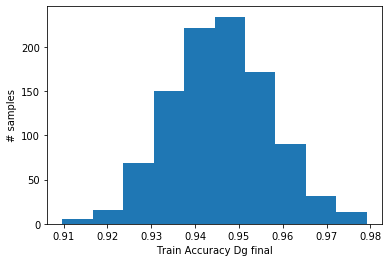

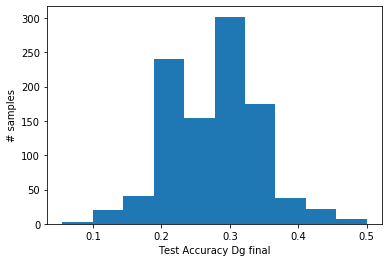

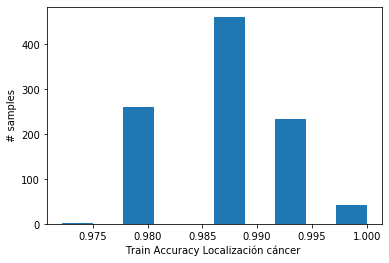

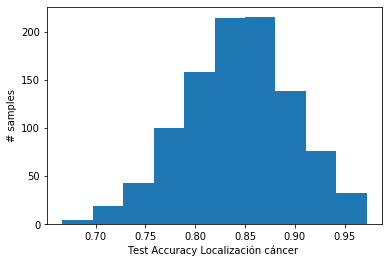

In [19]:
for key in ['Dg final', 'Localización cáncer ']:
    score_train, score_test = [], []
    for _ in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(df2, df[key], test_size=0.2)

        clf = RFC(class_weight='balanced_subsample')
        clf.fit(X=X_train, y=y_train)

        score_train.append(clf.score(X=X_train, y=y_train))
        score_test.append(clf.score(X=X_test, y=y_test))
        
    plt.hist(score_train)
    plt.xlabel('Train Accuracy '+ key)
    plt.ylabel('# samples')
    plt.show()
    plt.hist(score_test)
    plt.xlabel('Test Accuracy ' + key)
    plt.ylabel('# samples')
    plt.show()